#APP Reviews Sentiment analysis

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("linkedin-reviews.csv")

In [5]:
df.head(2)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1


In [7]:
df.head(6)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
5,This app is poor and bad. Linkedin app on my H...,1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


Exploratory Analysis=>

In [18]:
#exploratory data analysis=>
#we will start by analyzing the distributions of ratings,it will provide insight into the overall sentiment of the reviews.
#then we can explore further,such as analyzing the length of reviews ,
#and possibly derive insights from the text of the reviews

#PLotting the Distribution of Ratings

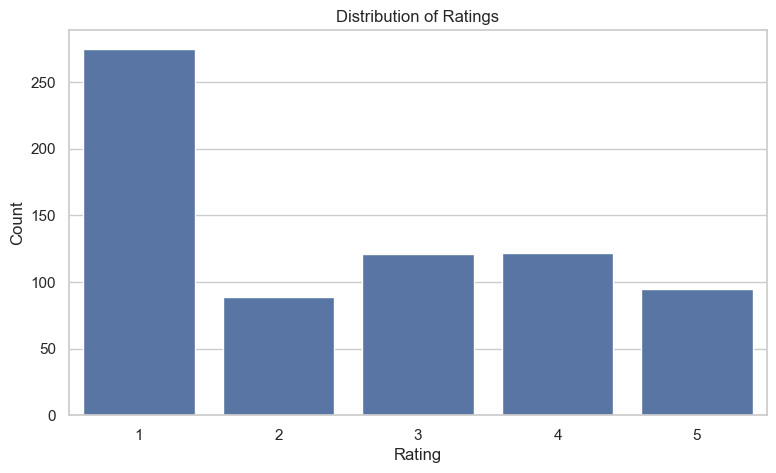

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Adding Sentiment Labels In the Data=>

In [29]:
#adding sentiment labels in the data=>
#we will use textblob library. textblob provides a polarity scores ranging from -1(very negative) to 1 (very positive) for a given text .
#we can use this score to classify each review's sentiment as positive ,negative or neutral

In [31]:
!pip install textblob

In [32]:
from textblob import TextBlob

In [35]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity>0.1:
        return 'Positive'
    elif sentiment.polarity<-0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [41]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)

In [43]:
df.sample(5)

,Review,Rating,Sentiment
146,please make it possible to move app2sd!,2,Neutral
241,Once loggedin all it did was try to connect. A...,1,Negative
433,this app should be great. But last update just...,4,Positive
184,Cannot edit profile...minus points!,3,Neutral
629,I AM A FAN!,5,Neutral


Analyzing App Reviews Sentiments

In [46]:
sentiment_distribution=df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Neutral     300
Positive    295
Negative    107
Name: count, dtype: int64

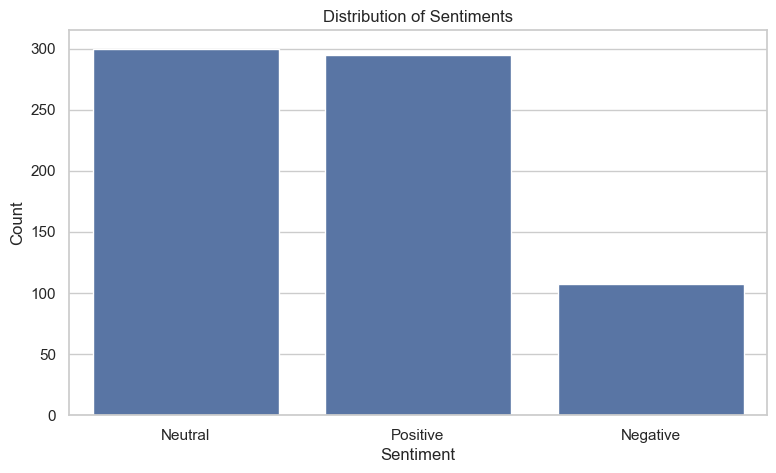

In [48]:
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So,we can see through the app has low ratings,still the reviewers don't
use many negative words in the reviews for the app

In [51]:
# next,we'll explore the relationship between the sentiments and the ratings.
# this analysis can help us understand whether there is a correlation between
# the sentiment of the text and numerical ratings.

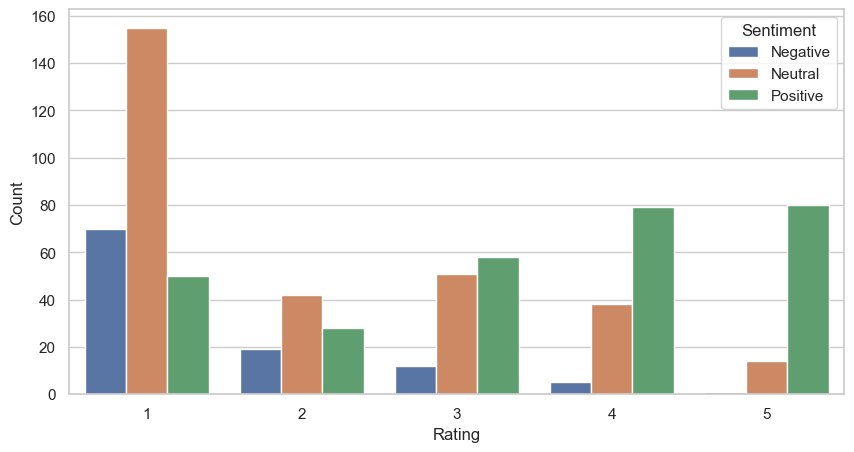

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
            x='Rating',
            hue='Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

#Summary

In [ ]:
# App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback,priortize feature updates
#and maintain a positive user community.
# it involves using data analysis technique to determine  whether the sentiments in these reviews are positive, negative or neutral.